<a href="https://colab.research.google.com/github/syunar/Sales-Report-by-using-DataStudio/blob/main/22_02_dataprep_and_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Store Sales EDA and Customer Segmentation Analysis**

## Table of Contents:
1. Purpose
2. Quick Overview
3. Data Exploration
4. Data Preparation
5. Data Analysis
6. Customer Segmentation
7. Conclusion

## 1. Purpose
The dataset that we have is one of the superstore's transaction datasets. So we gonna analyze to answer this kind of question:
- How much total sales in each year?
- How much total sales, average sales, and standard deviation of sales your company make in 2017?
- Which Segment has the highest profit in 2018?
- Which top 5 States have the least total sales between 15 April 2019 - 31 December 2019?
- What is the proportion of total sales (%) in West + Central in 2019?
- Find top 10 popular products during 2019-2020 in term of total number of orders / total sales / and time since last order

And the last section, we gonna grouping our customer (customer segmentation) by their behavior to use for designing promotions for each customer group to increase the effectiveness of the promotion because the customers have different behaviors, we cannot use the same promotion..
so I gonna use RFM Analysis to group the customers

R - Recency : Time since last order

F - Frequency : Total number of orders

M - Monetary : Total sales

And the last question:
- In our store which customer segment that we have the most?
- Some use case exmaple by using RFM analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Change defaults
sns.set(style='whitegrid', context='talk', palette='rainbow')
import warnings
warnings.filterwarnings("ignore")
from google.colab.data_table import DataTable
DataTable.max_columns = 30
import datetime as dt
from pandas.api.types import CategoricalDtype

In [2]:
def missing(df):
    """
    this function use for create dataframe which tell you sum of missing values
    and percent of missing values in each columns
    """
    total = df.isna().sum().sort_values(ascending=False)
    percent = df.isna().mean().sort_values(ascending=False)
    missing_values = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
    return missing_values[missing_values['percent'] > 0]

In [3]:
# Step
## 0. read data
## 1. basic EDA -> going though each column find meaning, data types
## 2. check missing values
## 3. check duplicated values
## 4. check outliers
## 5. query and analysis

df = pd.read_csv('/content/drive/MyDrive/End-to-End Data Science Projects/22-02_Store Sales Analysis & Customer Segmentation ML/01_Dataset/sample-store.csv')

# 2. Quick Overview

In [4]:
## overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

In [5]:
## clean column names
df.columns = df.columns.str.strip().str.lower()\
                .str.replace(" ","_")\
                .str.replace("-","_")\
                .str.replace("\/","_")\
                .str.replace(".","")
print(f'Number of columns: {len(df.columns)}')
df.columns

Number of columns: 21


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country_region', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [6]:
## number of unique values
df.nunique().sort_values()

country_region       1
category             3
segment              3
region               4
ship_mode            4
discount            12
quantity            14
sub_category        17
state               49
city               531
postal_code        630
customer_id        793
customer_name      793
order_date        1236
ship_date         1334
product_name      1849
product_id        1862
order_id          5009
sales             5825
profit            7287
row_id            9994
dtype: int64

# 3. Data Exploration

In [7]:
df.sample(3)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
2825,2826,US-2017-112914,9/25/2017,9/30/2017,Standard Class,MT-18070,Michelle Tran,Home Office,United States,Houston,...,77041.0,Central,FUR-BO-10003272,Furniture,Bookcases,O'Sullivan Living Dimensions 5-Shelf Bookcases,300.5328,2,0.32,-97.2312
3771,3772,US-2019-101196,5/12/2019,5/17/2019,Standard Class,FM-14215,Filia McAdams,Corporate,United States,Philadelphia,...,19140.0,East,OFF-ST-10004804,Office Supplies,Storage,"Belkin 19"" Vented Equipment Shelf, Black",82.3680,2,0.20,-19.5624
9977,9978,US-2019-103674,12/6/2019,12/10/2019,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,90032.0,West,OFF-FA-10003467,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7,0.00,0.0000


## After going through all columns
1. row_id 
	- category
	- index 
2. order_id
	- category
	- identify transaction 
3. order_date
	- datatime
	- identify transaction 
4. ship_date
	- datetime
	- transportation
5. ship_mode
	- ordered category
	- transportation
	- same day > first class >  second class > standard class
6. customer_id
	- category
	- identify customer
7. custimer_name
	- category
	- identify customer
8. segment
	- category
	- identify products
	- main category of product
9. country_region
	- category
	- location
	- now have only United States
10. city
	- category
	- location
11. state
	- category
	- location
12. postal_code
	- category
	- location
	- refer to city
13. region
	- category
	- location
14. product_id
	- category
	- identify products
15. category
	- category
	- identify products
16. sub-category
	- category
	- identify products
17. product_name
	- category
	- identify products
18. sales
	- numeric
	- business metrics
19. quantity
	- numeric
	- business metrics
20. discount
	- numeric
	- business metrics
21. profit
	- numeric
	- business metrics

# Data Preparation

## Convert Data Type

In [8]:
nums = ['sales', 'quantity', 'discount','profit']
nor_cats = ['row_id', 'order_id', 
       'customer_id', 'customer_name', 'segment', 'country_region', 'city',
       'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name',]
ord_cats = ['ship_mode']
dtimes = ['order_date', 'ship_date']

In [9]:
df['ship_mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
for num in nums:
    df[num] = df[num].apply(pd.to_numeric)
for cat in nor_cats:
    df[cat] = df[cat].astype('string')
for dtime in dtimes:
    df[dtime] = df[dtime].apply(pd.to_datetime)

ship_mode_cat = CategoricalDtype(categories=['Standard Class', 'Second Class', 'First Class', 'Same Day'], ordered=True)    
for cat in ord_cats:
    df[cat] = df[cat].astype(ship_mode_cat)

In [11]:
df['ship_mode'].dtypes

CategoricalDtype(categories=['Standard Class', 'Second Class', 'First Class', 'Same Day'], ordered=True)

In [12]:
df.dtypes

row_id                    string
order_id                  string
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode               category
customer_id               string
customer_name             string
segment                   string
country_region            string
city                      string
state                     string
postal_code               string
region                    string
product_id                string
category                  string
sub_category              string
product_name              string
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
dtype: object

## Handle Missing Values

In [13]:
## standardize missing values
df = df.replace(['NO DATA','N/A', 'null', 'Empty', '?', 'NaN', '', 'nan'],np.nan)

In [14]:
## check missing values
missing(df)

,total,percent
postal_code,11,0.001101


In [15]:
df[df['postal_code'].isna()].sample(4)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country_region,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit
9741,9742,CA-2018-117086,2018-11-08,2018-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,<NA>,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90,5,0.0,1013.1270
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,<NA>,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,<NA>,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,<NA>,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336


In [16]:
## drop na
df.dropna(subset=['postal_code'], inplace=True)

In [17]:
missing(df)

,total,percent


## Check Duplicated Values

In [18]:
# check duplicated rows
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          9983 non-null   string        
 1   order_id        9983 non-null   string        
 2   order_date      9983 non-null   datetime64[ns]
 3   ship_date       9983 non-null   datetime64[ns]
 4   ship_mode       9983 non-null   category      
 5   customer_id     9983 non-null   string        
 6   customer_name   9983 non-null   string        
 7   segment         9983 non-null   string        
 8   country_region  9983 non-null   string        
 9   city            9983 non-null   string        
 10  state           9983 non-null   string        
 11  postal_code     9983 non-null   string        
 12  region          9983 non-null   string        
 13  product_id      9983 non-null   string        
 14  category        9983 non-null   string        
 15  sub_

In [20]:
df.nunique().sort_values()

country_region       1
category             3
segment              3
region               4
ship_mode            4
discount            12
quantity            14
sub_category        17
state               48
city               531
postal_code        630
customer_id        793
customer_name      793
order_date        1235
ship_date         1334
product_name      1848
product_id        1861
order_id          5003
sales             5818
profit            7279
row_id            9983
dtype: int64

# 4. Data Analysis

In [21]:
df.describe()

,sales,quantity,discount,profit
count,9983.000000,9983.000000,9983.000000,9983.000000
mean,229.216818,3.788741,0.156375,28.463592
std,621.909610,2.223566,0.206501,234.122107
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.727100
50%,54.384000,3.000000,0.200000,8.643600
75%,209.905000,5.000000,0.200000,29.315200
max,22638.480000,14.000000,0.800000,8399.976000


In [22]:
df['order_date'].describe()

count                    9983
unique                   1235
top       2019-09-05 00:00:00
freq                       38
first     2017-01-03 00:00:00
last      2020-12-30 00:00:00
Name: order_date, dtype: object

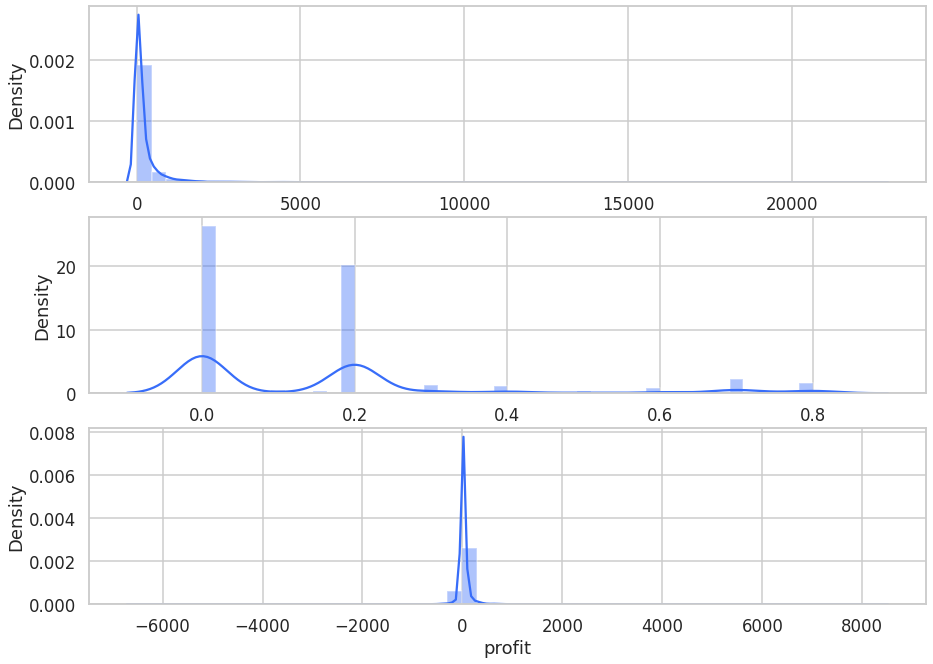

In [23]:
fig, ax = plt.subplots(3,1)
fig.set_figheight(11)
fig.set_figwidth(15)
sns.distplot(df['sales'],ax=ax[0])
sns.distplot(df['discount'],ax=ax[1])
sns.distplot(df['profit'],ax=ax[2])

## Q1: How much total sales in each years ?

In [24]:
df['year'], df['month'] = df['order_date'].dt.year, df['order_date'].dt.strftime('%b')

In [25]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
                             
data=df.groupby(['year','month'])['sales'].sum().reset_index()
data['month'].dtypes
data['m_y'] = data['month'].astype(str) + '_' + data['year'].astype(str)

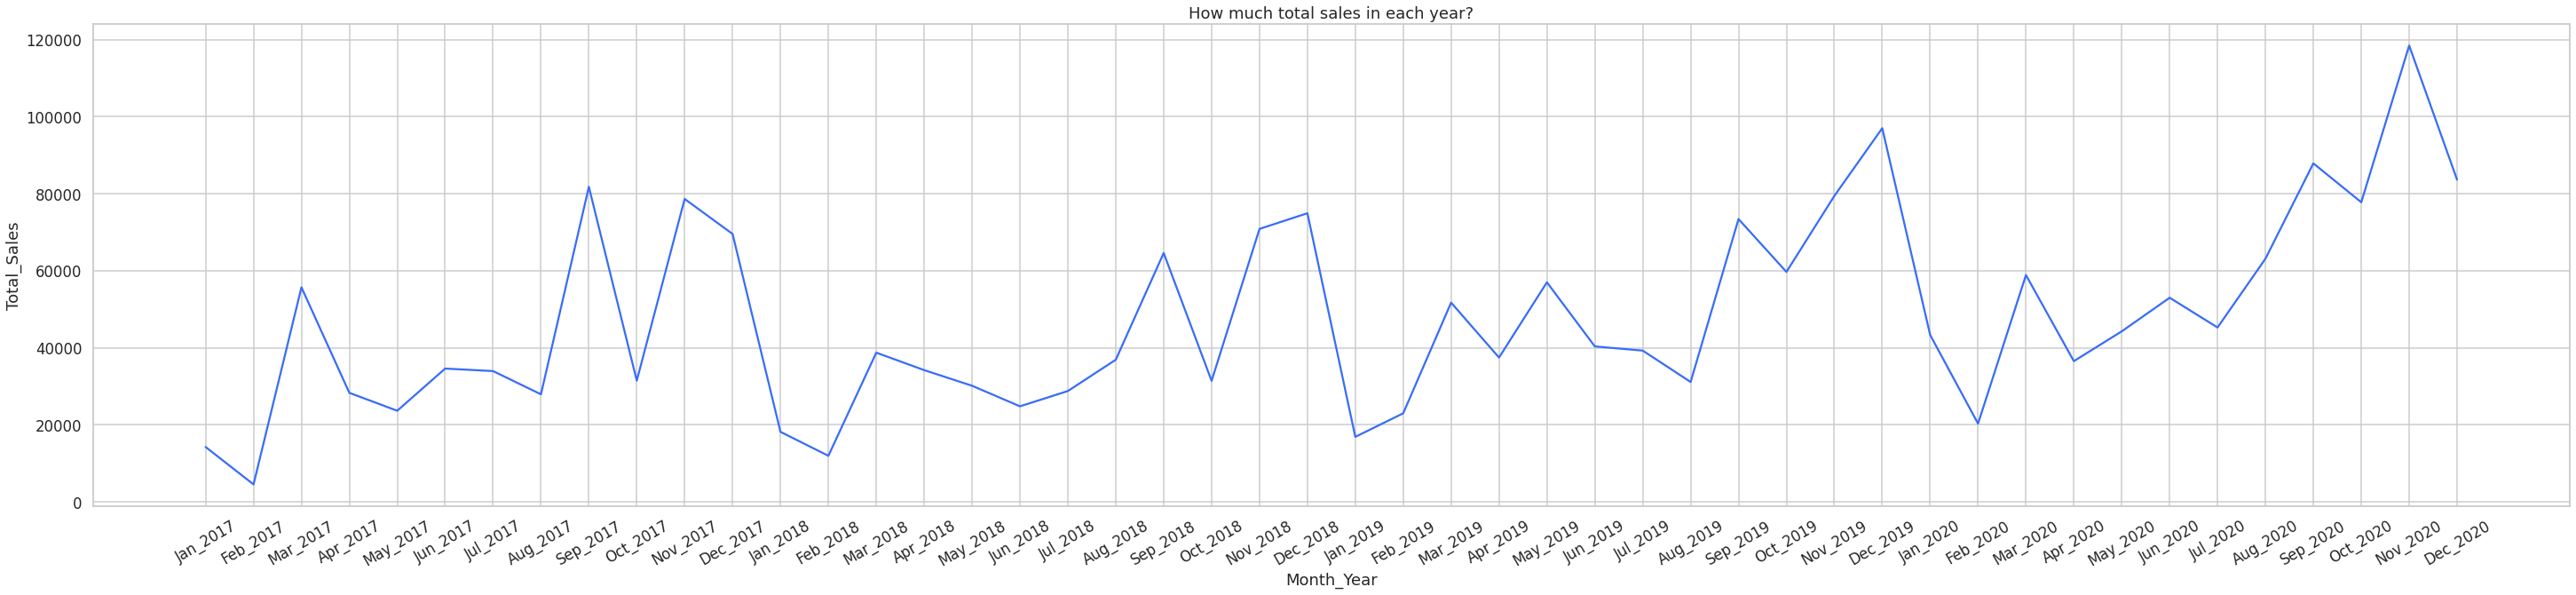

In [26]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=30)
plt.title('How much total sales in each year?')
plt.xlabel("Month_Year")
plt.ylabel("Total_Sales")
sns.lineplot(data=data,
             x=data['m_y'],
             y='sales');

Mostly in November and December You can see that the total sales have skyrocketed. It might be the month of Christmas elves. Therefore, customers are spending more on gifts for their loved.

On the other hand, in January and February Overall sales have dropped dramatically. So we know that our customers are spending habits in the last quarter. and did not spend much in the first quarter where we can plan events and campaigns

## Q2: How much total sales, average sales, and standard deviation of sales your company make in 2017 ?

In [27]:
df[(df['order_date'] >= '2017-01-01') & (df['order_date'] <= '2017-12-31')]['sales'].agg(['sum', 'mean', 'std']).to_frame()

,sales
sum,484247.498100
mean,242.974159
std,754.053357


## Q3: Which Segment has the highest profit in 2018 ?

In [28]:
high_pf_2018 = df.query('order_date >= "2017-01-01" and order_date <= "2017-12-31"').groupby('segment')['profit'].sum().reset_index()

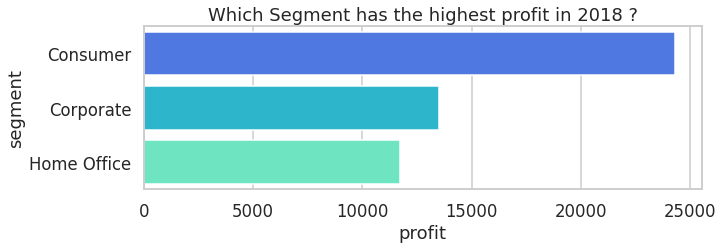

In [29]:
plt.figure(figsize=(10,3))
plt.title('Which Segment has the highest profit in 2018 ?')
sns.barplot(data=high_pf_2018, y='segment', x='profit');

## Q4: Which top 5 States have the least total sales between 15 April 2019 - 31 December 2019 ?

In [30]:
df.query('order_date > "2019-04-15" and order_date <= "2019-12-31"').groupby('state')['sales'].sum().sort_values().reset_index().head()

,state,sales
0,New Hampshire,49.05
1,New Mexico,64.08
2,District of Columbia,117.07
3,Louisiana,249.80
4,South Carolina,502.48


## Q5: What is the proportion of total sales (%) in West + Central in 2019 ? 

Total Sales all Region: 606238.5380000001
Total Sales in West and Central: 334909.5525 or equal 55% of total sales


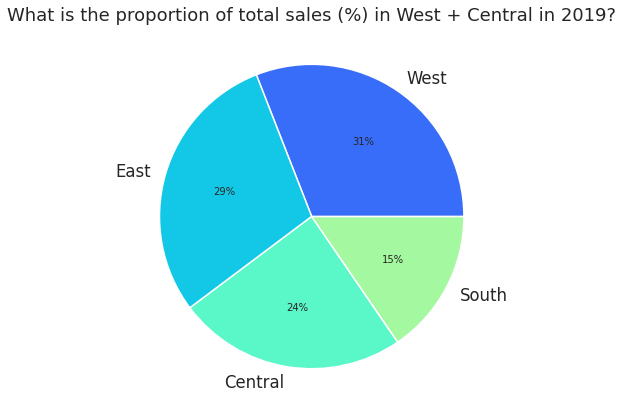

In [31]:
total_sales = df.query('order_date > "2019-01-01" and order_date <= "2019-12-31"')['sales'].sum()
sales_west_cen = df.query('(order_date > "2019-01-01" & order_date <= "2019-12-31") & (region == "West" | region == "Central")')['sales'].sum()

print(f'Total Sales all Region: {total_sales}')
print(f'Total Sales in West and Central: {sales_west_cen} or equal {round(sales_west_cen*100/total_sales)}% of total sales')

df_total_sales_by_region = df.query('(order_date > "2019-01-01" & order_date <= "2019-12-31")').groupby('region')['sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,7))
plt.title('What is the proportion of total sales (%) in West + Central in 2019?')
plt.pie(df_total_sales_by_region['sales'],
        labels=df_total_sales_by_region['region'],
        autopct='%.0f%%');

##   Q6: Find top 10 popular products during 2019-2020

In [32]:

product_rank = df.query('order_date >= "2019-01-01" & order_date <= "2019-12-31"')\
                 .groupby(['product_name','category']).agg({'product_name':'count',
                                                            'sales':'mean',
                                                            'order_date':'max'})\
                 .rename(columns={'product_name':'n_orders', 'sales':'total_sales', 'order_date':'lastdate_purchase_ago'})\
                 .reset_index()


# datedif between last_time_purchase and date_now assume data_now='2020-01-01'
product_rank['lastdate_purchase_ago'] = (dt.datetime(2020,1,1) - product_rank['lastdate_purchase_ago']).apply(lambda s: s.days)
product_rank.head()

,product_name,category,n_orders,total_sales,lastdate_purchase_ago
0,"#10 Gummed Flap White Envelopes, 100/Box",Office Supplies,2,12.390,268
1,#10 Self-Seal White Envelopes,Office Supplies,3,28.834,78
2,"#10 White Business Envelopes,4 1/8 x 9 1/2",Office Supplies,2,117.525,27
3,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",Office Supplies,1,22.920,31
4,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Office Supplies,2,624.480,131


### Top 10 popular products in terms of number of orders during 2019-2020

In [33]:
product_rank = product_rank[['product_name', 'category', 'lastdate_purchase_ago', 'n_orders', 'total_sales']]

In [34]:
product_rank.sort_values(by='n_orders', ascending=False).head(10)

,product_name,category,lastdate_purchase_ago,n_orders,total_sales
399,Easy-staple paper,Office Supplies,27,11,41.422909
1099,Staple envelope,Office Supplies,8,11,27.590182
323,Chromcraft Round Conference Tables,Furniture,31,9,575.157000
1105,Staples,Office Supplies,43,9,25.290222
1349,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",Office Supplies,30,7,32.505714
967,Premium Transparent Presentation Covers by GBC,Office Supplies,57,6,50.002333
51,Acco Perma 4000 Stacking Storage Drawers,Office Supplies,21,6,46.554667
634,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,2,6,1061.313000
674,Ibico EB-19 Dual Function Manual Binding System,Office Supplies,26,6,377.694833
196,Avery Non-Stick Binders,Office Supplies,45,6,8.381333


### Top 10 popular products in terms total sales during 2019-2020

In [35]:
product_rank.sort_values(by='total_sales', ascending=False).head(10)

,product_name,category,lastdate_purchase_ago,n_orders,total_sales
303,Canon imageCLASS 2200 Advanced Copier,Technology,91,2,12949.963
13,"3D Systems Cube Printer, 2nd Generation, Magenta",Technology,260,1,9099.930
597,HP Designjet T520 Inkjet Large Format Printer ...,Technology,333,1,8749.950
127,Ativa V4110MDD Micro-Cut Shredder,Technology,306,1,4899.930
675,Ibico EPK-21 Electric Binding System,Office Supplies,72,1,4535.976
359,Cubify CubeX 3D Printer Double Head Print,Technology,37,1,4499.985
613,High Speed Automatic Electric Letter Opener,Office Supplies,294,2,4421.331
213,Bady BDG101FRU Card Printer,Technology,239,1,3999.950
910,Okidata MB760 Printer,Technology,191,2,3917.200
611,Hewlett Packard LaserJet 3310 Copier,Technology,89,2,3419.943


### Top 10 Unpopular products in terms last time purchase during 2019-2020

In [36]:
product_rank.sort_values(by='lastdate_purchase_ago', ascending=False).head(10)

,product_name,category,lastdate_purchase_ago,n_orders,total_sales
542,GE 30522EE2,Technology,364,1,231.980
645,Hon Practical Foundations 30 x 60 Training Tab...,Furniture,363,1,1592.850
993,Recycled Steel Personal File for Hanging File ...,Office Supplies,363,1,114.460
854,Newell 337,Office Supplies,361,1,5.248
751,Logitech B530 USB Headset - headset - Full siz...,Technology,361,1,59.184
915,Panasonic KP-350BK Electric Pencil Sharpener w...,Office Supplies,359,1,34.580
1360,netTALK DUO VoIP Telephone Service,Technology,357,1,377.928
761,Logitech Media Keyboard K200,Technology,356,1,69.980
1169,Ultra Door Push Plate,Furniture,355,1,54.992
1316,Xerox 2,Office Supplies,355,1,15.552


# 5. Customer Segmentation

In [37]:
# recency = time since last order
# frequency = total number of orders
# monetary = total sales

rfm_customer = df.groupby('customer_name')\
            .agg({'order_date': lambda x:(dt.datetime(2021,1,1) - x.max()).days,
                  'order_id': lambda x: len(x),
                  'sales': lambda x: x.sum()})\
            .rename(columns={'order_date': 'recency',
                             'order_id': 'frequency',
                             'sales': 'monetary'})\
            .reset_index()
rfm_customer.head()

,customer_name,recency,frequency,monetary
0,Aaron Bergman,418,6,886.156
1,Aaron Hawkins,14,11,1744.700
2,Aaron Smayling,90,10,3050.692
3,Adam Bellavance,56,18,7755.620
4,Adam Hart,36,20,3250.337


In [38]:
# Discretizer
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
rfmscore = pd.DataFrame(trans.fit_transform(rfm_customer[['recency', 'frequency', 'monetary']]).astype('int') + 1, columns=['r_score','f_score','m_score'])
rfmscore.head()

,r_score,f_score,m_score
0,5,1,1
1,1,3,3
2,3,3,4
3,3,5,5
4,2,5,4


In [39]:
# Flip value of r_score first. If value = 5, it means the last purchase date is long so after filp it should be 1
rfmscore['r_score'] = 6-rfmscore['r_score']
rfmscore['r_score']

0      1
1      5
2      3
3      3
4      4
      ..
788    4
789    5
790    5
791    3
792    2
Name: r_score, Length: 793, dtype: int64

In [40]:
# join dataframe
rfm_customer = rfm_customer.join(rfmscore)

# add column that use for categories
rfm_customer['rfm_score'] = (rfm_customer['r_score'].astype(str)+rfm_customer['f_score'].astype(str)+rfm_customer['m_score'].astype(str)).astype('category')
rfm_customer.head()

,customer_name,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,Aaron Bergman,418,6,886.156,1,1,1,111
1,Aaron Hawkins,14,11,1744.700,5,3,3,533
2,Aaron Smayling,90,10,3050.692,3,3,4,334
3,Adam Bellavance,56,18,7755.620,3,5,5,355
4,Adam Hart,36,20,3250.337,4,5,4,454


## Top 5 Customer Segments of the store by RFM Analysis

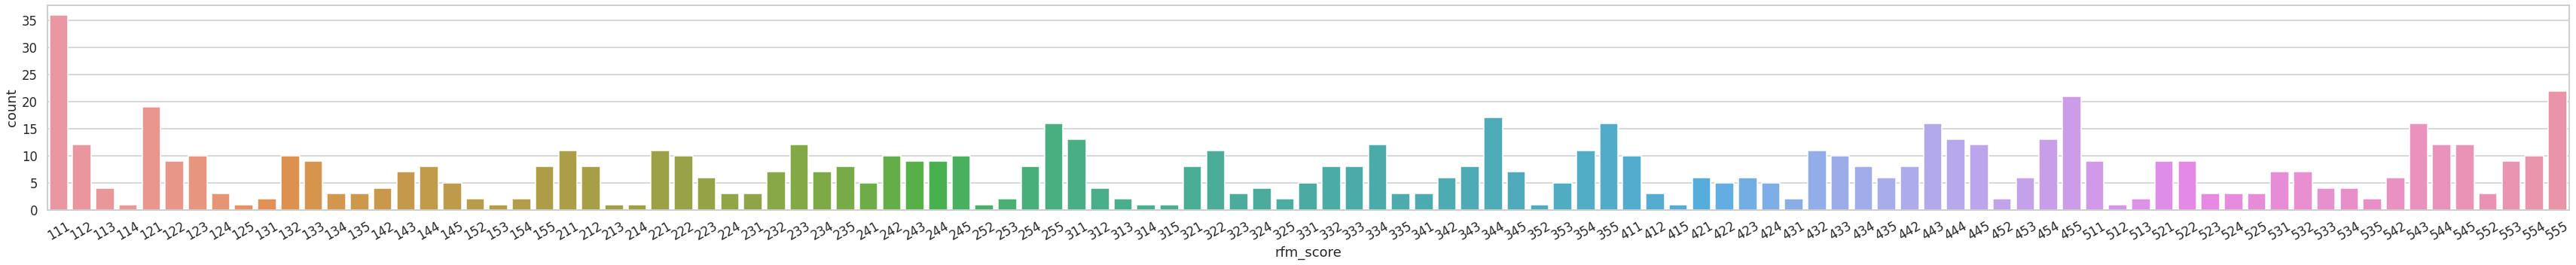

In [41]:
plt.figure(figsize=(60,5))
plt.xticks(rotation=30)
sns.countplot(x='rfm_score', data=rfm_customer,order = rfm_customer.sort_values(by='rfm_score')['rfm_score'].unique().to_list());

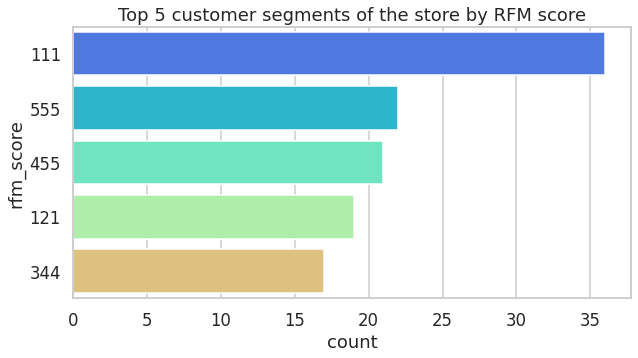

In [42]:
plt.figure(figsize=(10,5))
plt.title('Top 5 customer segments of the store by RFM score')
sns.countplot(y='rfm_score', data=rfm_customer,order = rfm_customer['rfm_score'].value_counts().head(5).index);

1. 111, 121 : Less engaged customers who are less active have few orders and have less sales
2. 555, 455 : Highly engaged customers who have bought the most recent, the most often, and generated the most revenue for company
3. 344 : High mid-level of customers that between those 2 groups above

After using RFM segmentation analysis, there are many ways marketers have used this segmentation to help guide their marketing. Here are a few example ideas:

1. **RFM Score: 4X5, 4X5, 5X5 / Brand Loyalty**
- Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.
- Cross and Up selling introduce new products and maybe get the feedback. These customers have proven to have a higher willingness to pay

2. **RFM Score: 441, 442, 551 / Price Sensitivity**
- Highly engaged customers but not spend much money.
- Can be used marketing strategies like Discount Promotion or Free Shipping to increase revenue.

3. **RFM Score: 14X, 15X / Once Great Customer but Now Gone**
- Users that are great customers before but now leave our store for some reasons
- Have to take a look to find out Why they leave? and use marketing strategies like good prices deals or new products, new feature launches

4. **RFM Score: 411, 421 / New Customers**
- New Customers
- Can be used marketing strategies like the discount for new customers to continually engage to our product.

# 7. Concusion
There are many ways to increase your sales or revenue, namely customer segmentation and product performance that we analyzed in this article to help with marketing. There are also other methods such as Finding new people to become our customers or finding factors to reduce production costs and cross and up-selling products, locations , etc...

> > " The best marketing strategy ever: **CARE** " - *Gary Vaynerchuk*



Many thanks!

**Date**: 28 July 2022

**Author**: Supakorn Dumnin